In [ ]:
import pandas as pd

df = pd.read_csv('/content/dataset of air polution.csv')
display(df.head())
display(df.info())

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Bihar,Patna,"DRM Office Danapur, Patna - BSPCB",07-01-2025 17:00:00,25.586562,85.043586,OZONE,4.0,16.0,11.0
1,India,Chhattisgarh,Kunjemura,"OP Jindal School, Kunjemura - CECB",07-01-2025 17:00:00,22.126650,83.483212,OZONE,3.0,4.0,3.0
2,India,Arunachal_Pradesh,Naharlagun,"Naharlagun, Naharlagun - APSPCB",07-01-2025 17:00:00,27.103358,93.679645,OZONE,3.0,3.0,3.0
3,India,Assam,Guwahati,"LGBI Airport, Guwahati - PCBA",07-01-2025 17:00:00,26.108870,91.589544,OZONE,16.0,22.0,19.0
4,India,Chhattisgarh,Bhilai,"32Bungalows, Bhilai - CECB",07-01-2025 17:00:00,21.194815,81.314770,OZONE,1.0,77.0,65.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        503 non-null    object 
 1   state          503 non-null    object 
 2   city           503 non-null    object 
 3   station        503 non-null    object 
 4   last_update    503 non-null    object 
 5   latitude       503 non-null    float64
 6   longitude      503 non-null    float64
 7   pollutant_id   503 non-null    object 
 8   pollutant_min  500 non-null    float64
 9   pollutant_max  500 non-null    float64
 10  pollutant_avg  500 non-null    float64
dtypes: float64(5), object(6)
memory usage: 43.4+ KB


None

In [ ]:
display(df.describe(include='all'))

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
count,503,503,503,503,503,503.000000,503.000000,503,500.000000,500.000000,500.000000
unique,1,30,260,503,1,NaN,NaN,4,NaN,NaN,NaN
top,India,Maharashtra,Delhi,"Victoria, Kolkata - WBPCB",07-01-2025 17:00:00,NaN,NaN,OZONE,NaN,NaN,NaN
freq,503,88,38,1,503,NaN,NaN,472,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,22.134027,78.662043,NaN,14.610000,56.116000,40.196000
std,NaN,NaN,NaN,NaN,NaN,5.607419,4.873129,NaN,14.876172,45.968127,32.597773
min,NaN,NaN,NaN,NaN,NaN,8.514909,70.909168,NaN,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,18.650506,75.455450,NaN,5.000000,22.000000,18.000000
50%,NaN,NaN,NaN,NaN,NaN,23.002657,77.393848,NaN,11.000000,46.000000,34.000000
75%,NaN,NaN,NaN,NaN,NaN,26.795166,80.630666,NaN,20.000000,77.000000,54.250000


In [ ]:
missing_values = df.isnull().sum()
display("Missing values per column:")
display(missing_values)

'Missing values per column:'

,0
country,0
state,0
city,0
station,0
last_update,0
latitude,0
longitude,0
pollutant_id,0
pollutant_min,3
pollutant_max,3


In [ ]:
for col in ['pollutant_min', 'pollutant_max', 'pollutant_avg']:
  df[col] = df[col].fillna(df[col].mean())

In [ ]:
missing_values_after_fill = df.isnull().sum()
display("Missing values per column after filling:")
display(missing_values_after_fill)

'Missing values per column after filling:'

,0
country,0
state,0
city,0
station,0
last_update,0
latitude,0
longitude,0
pollutant_id,0
pollutant_min,0
pollutant_max,0


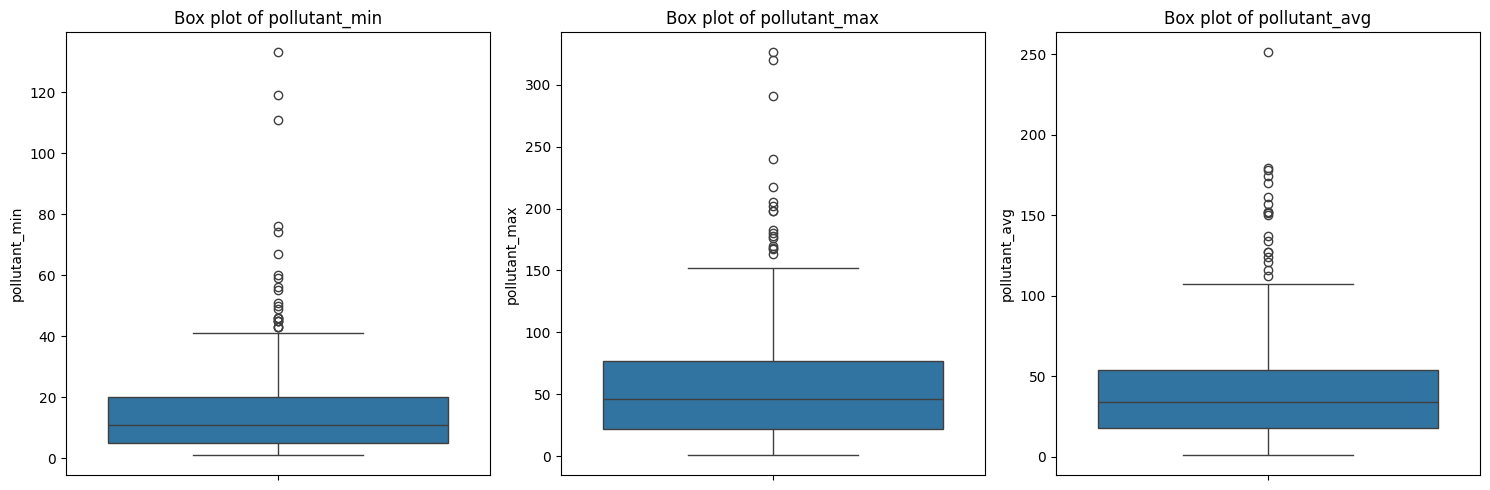

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['pollutant_min', 'pollutant_max', 'pollutant_avg']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

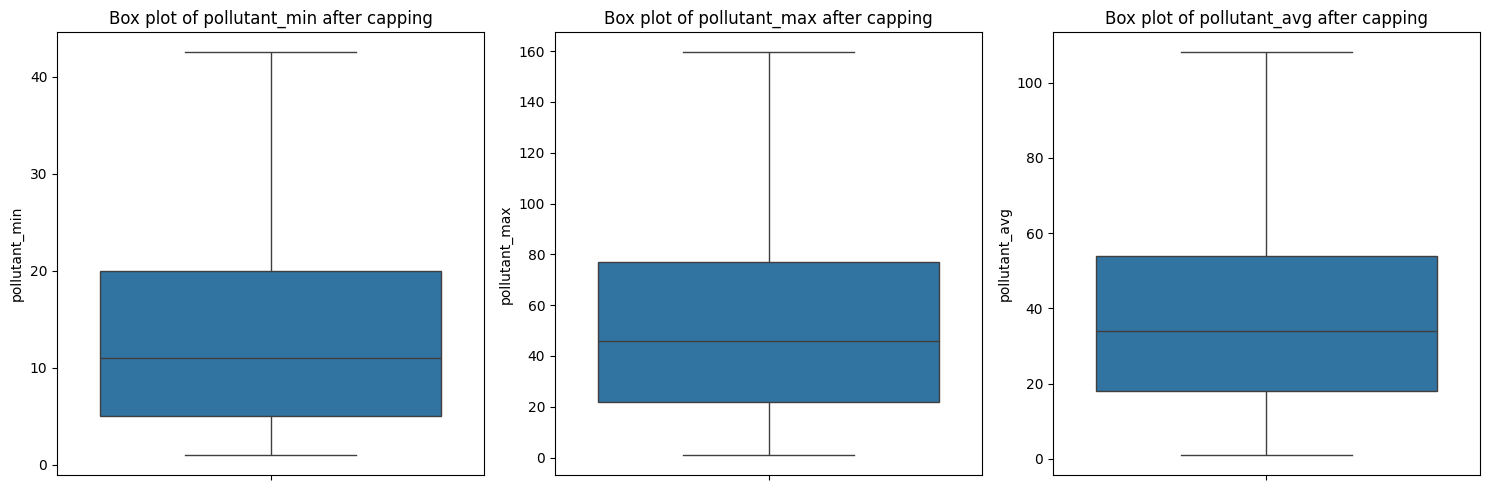

In [ ]:
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    df[col] = df[col].clip(upper=upper_bound)

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col} after capping')
plt.tight_layout()
plt.show()

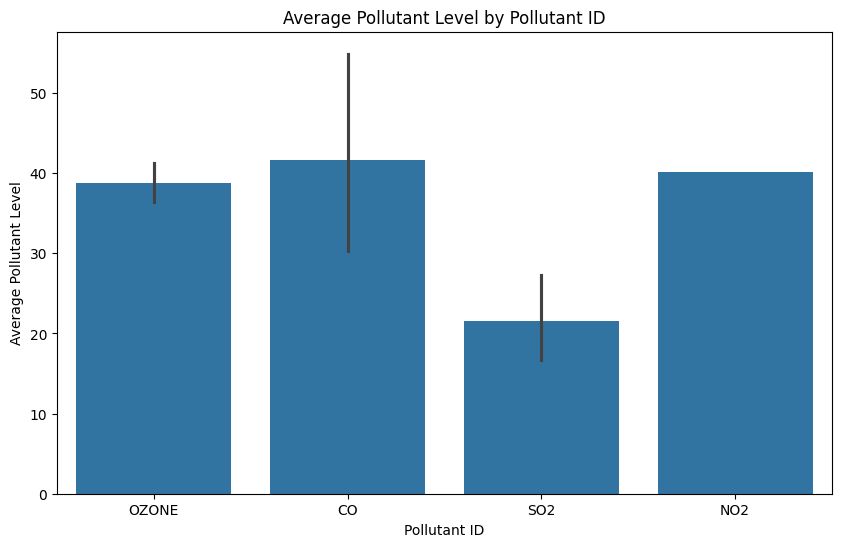

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='pollutant_id', y='pollutant_avg', data=df)
plt.title('Average Pollutant Level by Pollutant ID')
plt.xlabel('Pollutant ID')
plt.ylabel('Average Pollutant Level')
plt.show()